<a href="https://colab.research.google.com/github/sayevvv/PCVK_2025/blob/main/PCVK_Modul9_Morfologi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tugas 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library

In [2]:
# Tugas 2: Import Library
import cv2
import numpy as np
from matplotlib import pyplot as plt

Persiapan Gambar

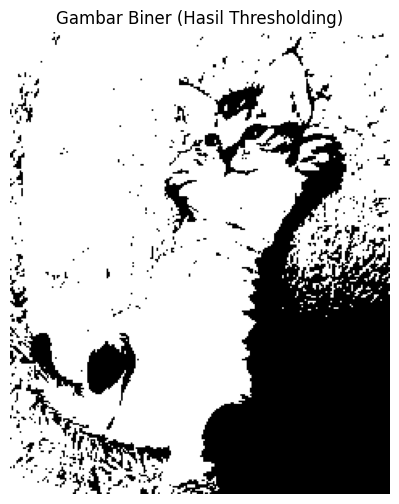

In [3]:
# --- Persiapan Gambar ---
# Tentukan path gambar sesuai instruksi Anda
image_path = '/content/drive/MyDrive/PCVK/Images/kitten.jpg'

# Baca gambar
img_color = cv2.imread(image_path)

# Cek apakah gambar berhasil dimuat
if img_color is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}")
else:
    # Konversi ke Grayscale
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Terapkan binary thresholding
    # Piksel > 127 menjadi 255 (putih/objek), sisanya 0 (hitam/background)
    (thresh, img_thresh) = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

    # Tampilkan gambar hasil thresholding untuk memastikan
    plt.figure(figsize=(6, 6))
    plt.imshow(img_thresh, cmap='gray')
    plt.title("Gambar Biner (Hasil Thresholding)")
    plt.axis('off')
    plt.show()

Dilasi Cross 3x3

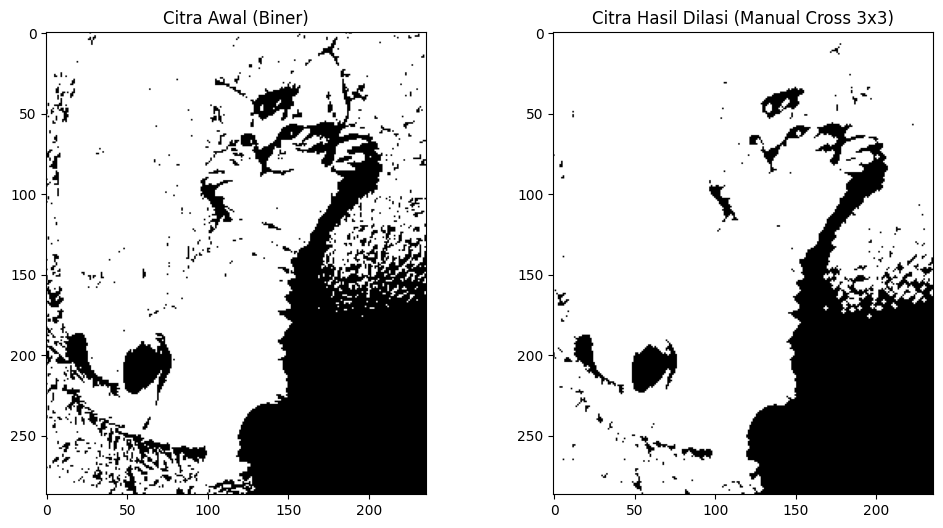

In [4]:
# Tugas 3: Dilasi 3x3 Cross (Manual)

def manual_dilation(image, kernel):
    """Fungsi dilasi manual"""
    # Dapatkan ukuran gambar dan kernel
    img_h, img_w = image.shape
    se_h, se_w = kernel.shape

    # Tentukan padding
    pad_h = se_h // 2
    pad_w = se_w // 2

    # Buat gambar output (diisi 0) dan gambar yg sudah di-padding
    output = np.zeros_like(image)
    img_pad = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Iterasi pada setiap piksel di gambar ASLI
    for y in range(img_h):
        for x in range(img_w):
            # Ambil bagian neighborhood
            neighborhood = img_pad[y:y+se_h, x:x+se_w]

            # Prinsip Dilasi:
            # Jika SETIDAKNYA SATU piksel di kernel (yg bernilai 1)
            # tumpang tindih dengan piksel OBJEK (255) di neighborhood,
            # maka piksel output di (y, x) menjadi 255 (objek).

            # Operasi A[AND]B
            overlap = (neighborhood == 255) & (kernel == 1)

            if np.any(overlap):
                output[y, x] = 255

    return output

# Pastikan img_thresh sudah ada dari Cell 3
if 'img_thresh' in locals():
    # Definisikan SE 3x3 Cross (1 = bagian dari SE, 0 = bukan)
    se_cross_3x3 = np.array([[0, 1, 0],
                             [1, 1, 1],
                             [0, 1, 0]], dtype=np.uint8)

    # Lakukan dilasi manual
    img_dilasi_manual = manual_dilation(img_thresh, se_cross_3x3)

    # Tampilkan hasil
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("Citra Awal (Biner)")

    plt.subplot(1, 2, 2)
    plt.imshow(img_dilasi_manual, cmap='gray')
    plt.title("Citra Hasil Dilasi (Manual Cross 3x3)")
    plt.show()

else:
    print("Harap jalankan Cell 3 terlebih dahulu untuk memuat gambar.")

Dilasi Cross 3x3 - Library OpenCV

Structuring Element (Cross 3x3):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


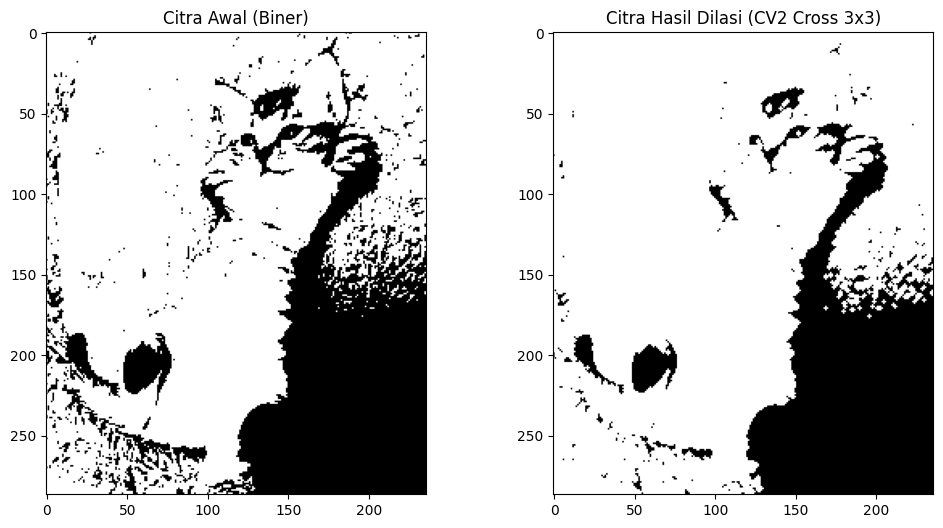

In [5]:
# Tugas 4: Dilasi 3x3 Cross (Library OpenCV)

if 'img_thresh' in locals():
    # Membuat Structuring Element 3x3 Cross menggunakan OpenCV
    kernel_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    # Cetak kernel-nya sesuai permintaan tugas
    print("Structuring Element (Cross 3x3):")
    print(kernel_cross_3x3)

    # Lakukan operasi dilasi
    img_dilasi_cv = cv2.dilate(img_thresh, kernel_cross_3x3, iterations=1)

    # Tampilkan hasil
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("Citra Awal (Biner)")

    plt.subplot(1, 2, 2)
    plt.imshow(img_dilasi_cv, cmap='gray')
    plt.title("Citra Hasil Dilasi (CV2 Cross 3x3)")
    plt.show()

else:
    print("Harap jalankan Cell 3 terlebih dahulu untuk memuat gambar.")

Erosi Square 5x5 - Tanpa Library

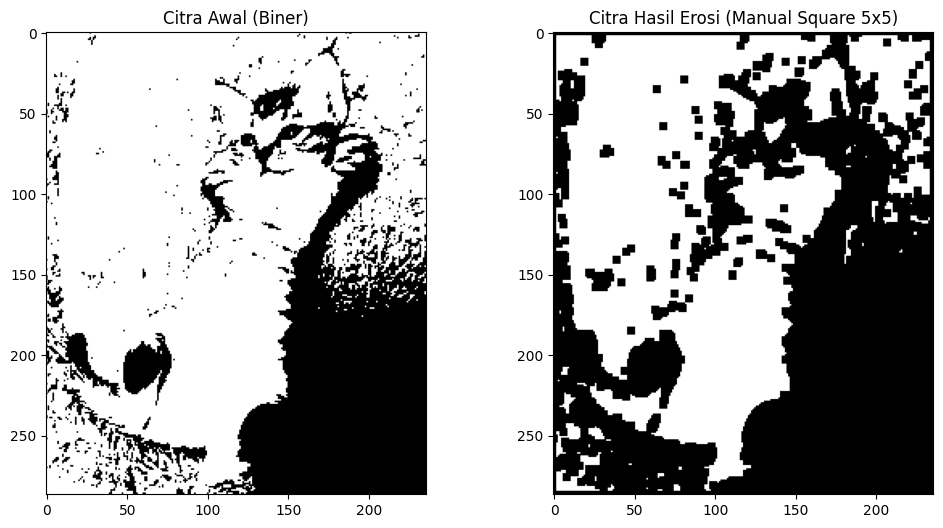

In [6]:
# Tugas 5: Erosi 5x5 Square (Manual)

def manual_erosion(image, kernel):
    """Fungsi erosi manual"""
    img_h, img_w = image.shape
    se_h, se_w = kernel.shape
    pad_h = se_h // 2
    pad_w = se_w // 2

    output = np.zeros_like(image)
    img_pad = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Iterasi pada setiap piksel
    for y in range(img_h):
        for x in range(img_w):
            neighborhood = img_pad[y:y+se_h, x:x+se_w]

            # Prinsip Erosi:
            # Piksel output (y, x) menjadi 255 HANYA JIKA
            # SEMUA piksel di kernel (yg bernilai 1)
            # tumpang tindih dengan piksel OBJEK (255) di neighborhood.
            # (SE "cocok" atau "fit" seluruhnya di dalam objek) [cite: 157]

            # Cek "hit":
            # (neighborhood == 255) -> Piksel gambar adalah objek
            # (kernel == 0) -> Piksel SE tidak relevan (diabaikan)
            # Jika salah satu dari ini True, piksel tsb "cocok".
            hit = (neighborhood == 255) | (kernel == 0)

            if np.all(hit):
                output[y, x] = 255

    return output

if 'img_thresh' in locals():
    # Definisikan SE 5x5 Square (persegi)
    se_square_5x5 = np.ones((5, 5), dtype=np.uint8)

    # Lakukan erosi manual
    img_erosi_manual = manual_erosion(img_thresh, se_square_5x5)

    # Tampilkan hasil
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("Citra Awal (Biner)")

    plt.subplot(1, 2, 2)
    plt.imshow(img_erosi_manual, cmap='gray')
    plt.title("Citra Hasil Erosi (Manual Square 5x5)")
    plt.show()

else:
    print("Harap jalankan Cell 3 terlebih dahulu untuk memuat gambar.")

Erosi Square 5x5 - Library OpenCV


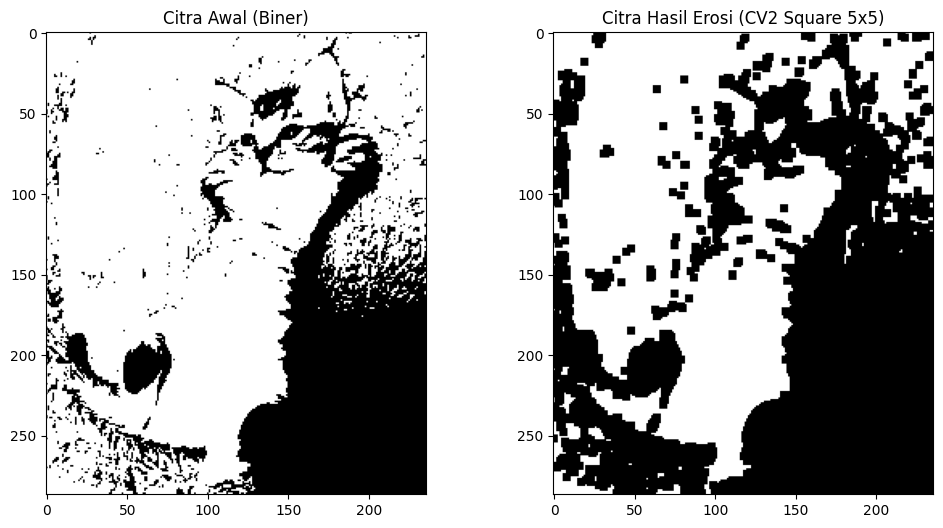

In [7]:
# Tugas 6: Erosi 5x5 Square (Library OpenCV)

if 'img_thresh' in locals():
    # Membuat Structuring Element 5x5 Square (Rectangle)
    kernel_square_5x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

    # Lakukan operasi erosi
    img_erosi_cv = cv2.erode(img_thresh, kernel_square_5x5, iterations=1)

    # Tampilkan hasil
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("Citra Awal (Biner)")

    plt.subplot(1, 2, 2)
    plt.imshow(img_erosi_cv, cmap='gray')
    plt.title("Citra Hasil Erosi (CV2 Square 5x5)")
    plt.show()

else:
    print("Harap jalankan Cell 3 terlebih dahulu untuk memuat gambar.")

Opening 3x3 - Tanpa Library

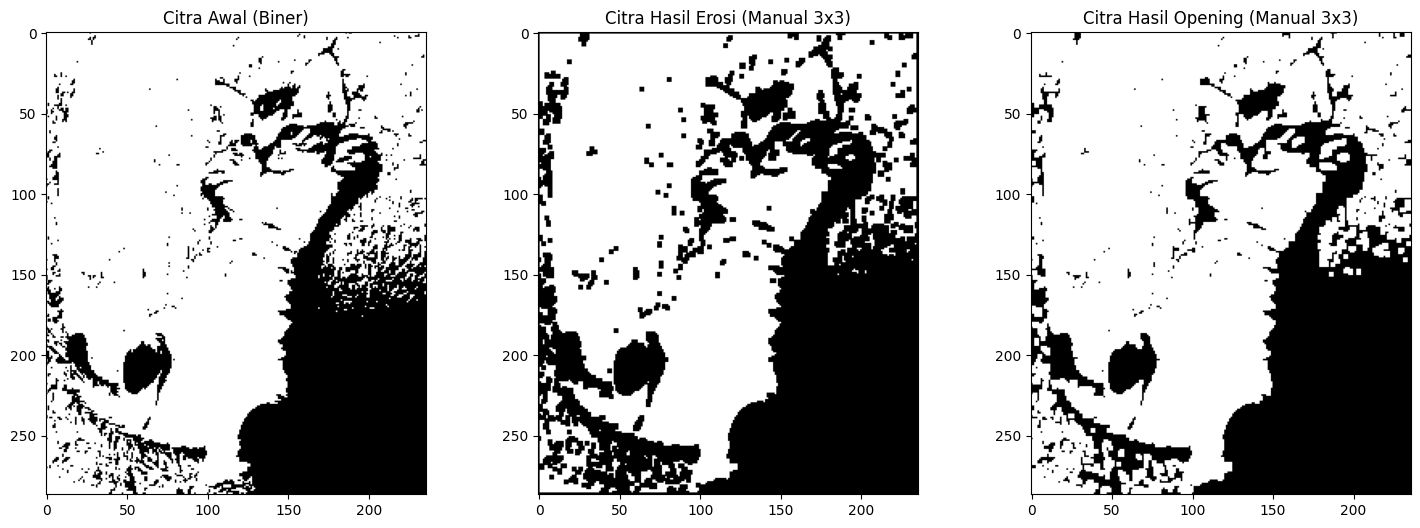

In [8]:
# Tugas 7: Opening 3x3 Square (Manual)

if 'img_thresh' in locals():
    # Definisikan SE 3x3 Square
    se_square_3x3 = np.ones((3, 3), dtype=np.uint8)

    # Langkah 1: Erosi manual
    # (Sesuai definisi Opening: Erosi dulu, baru Dilasi) [cite: 198, 202]
    img_opening_step1 = manual_erosion(img_thresh, se_square_3x3)

    # Langkah 2: Dilasi manual (pada HASIL erosi)
    img_opening_final = manual_dilation(img_opening_step1, se_square_3x3)

    # Tampilkan hasil (sesuai layout PDF [cite: 369-397])
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("Citra Awal (Biner)")

    plt.subplot(1, 3, 2)
    plt.imshow(img_opening_step1, cmap='gray')
    plt.title("Citra Hasil Erosi (Manual 3x3)")

    plt.subplot(1, 3, 3)
    plt.imshow(img_opening_final, cmap='gray')
    plt.title("Citra Hasil Opening (Manual 3x3)")
    plt.show()

else:
    print("Harap jalankan Cell 3 terlebih dahulu untuk memuat gambar.")

Opening 3x3 - Library OpenCV

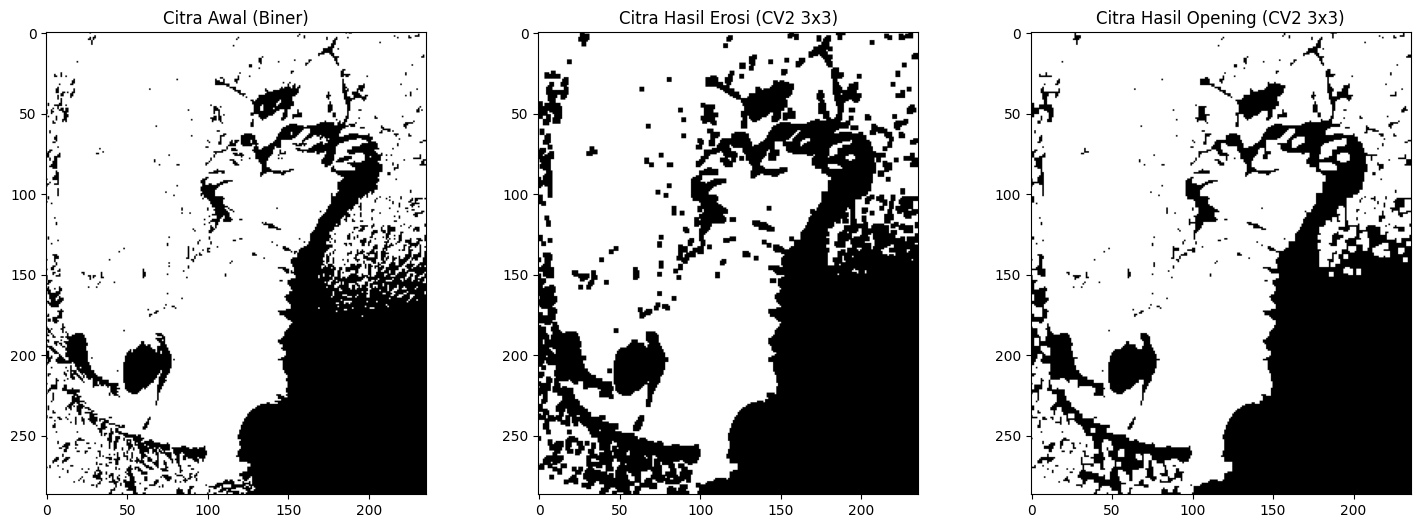

In [9]:
# Tugas 7: Opening 3x3 Square (Library OpenCV)

if 'img_thresh' in locals():
    # Definisikan SE 3x3 Square
    kernel_square_3x3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Kita tampilkan juga hasil erosi-nya agar sesuai layout PDF [cite: 369-397]
    img_erosi_cv_3x3 = cv2.erode(img_thresh, kernel_square_3x3, iterations=1)

    # Lakukan operasi Opening
    img_opening_cv = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel_square_3x3)

    # Tampilkan hasil
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("Citra Awal (Biner)")

    plt.subplot(1, 3, 2)
    plt.imshow(img_erosi_cv_3x3, cmap='gray')
    plt.title("Citra Hasil Erosi (CV2 3x3)")

    plt.subplot(1, 3, 3)
    plt.imshow(img_opening_cv, cmap='gray')
    plt.title("Citra Hasil Opening (CV2 3x3)")
    plt.show()

else:
    print("Harap jalankan Cell 3 terlebih dahulu untuk memuat gambar.")

Closing 3x3 - Library OpenCV

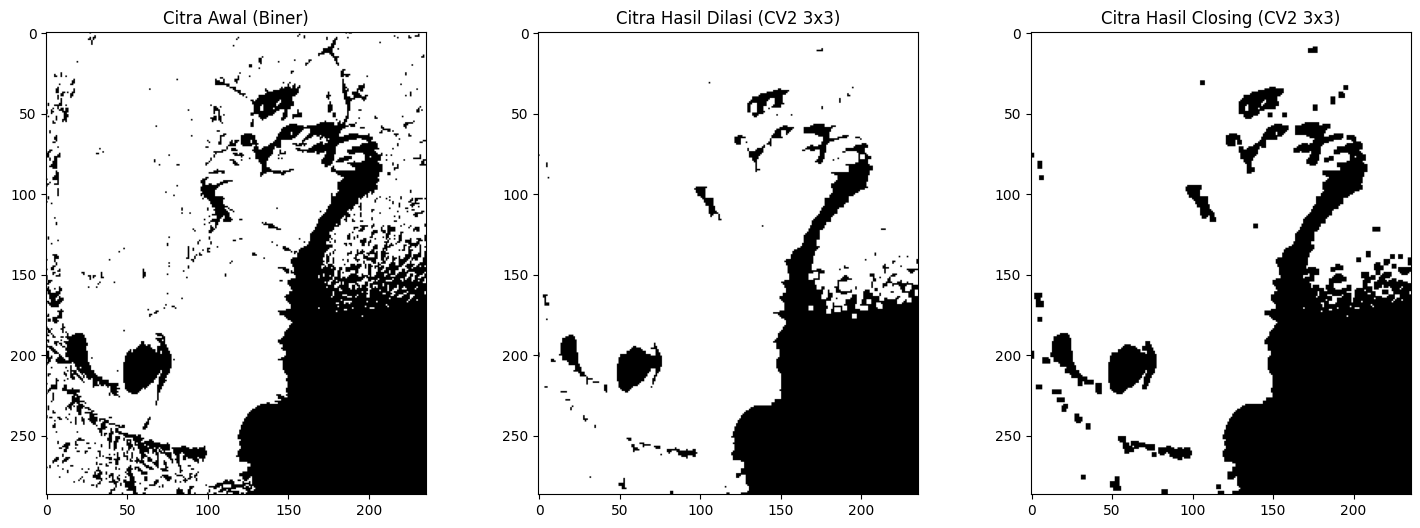

In [10]:
# Tugas 8: Closing 3x3 Square (Library OpenCV)

if 'img_thresh' in locals():
    # Definisikan SE 3x3 Square
    kernel_square_3x3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Kita tampilkan juga hasil dilasi-nya agar sesuai layout PDF [cite: 402-432]
    img_dilasi_cv_3x3 = cv2.dilate(img_thresh, kernel_square_3x3, iterations=1)

    # Lakukan operasi Closing
    img_closing_cv = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel_square_3x3)

    # Tampilkan hasil
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("Citra Awal (Biner)")

    plt.subplot(1, 3, 2)
    plt.imshow(img_dilasi_cv_3x3, cmap='gray')
    plt.title("Citra Hasil Dilasi (CV2 3x3)")

    plt.subplot(1, 3, 3)
    plt.imshow(img_closing_cv, cmap='gray')
    plt.title("Citra Hasil Closing (CV2 3x3)")
    plt.show()

else:
    print("Harap jalankan Cell 3 terlebih dahulu untuk memuat gambar.")

Dilasi Cross 3x3 & 5x5

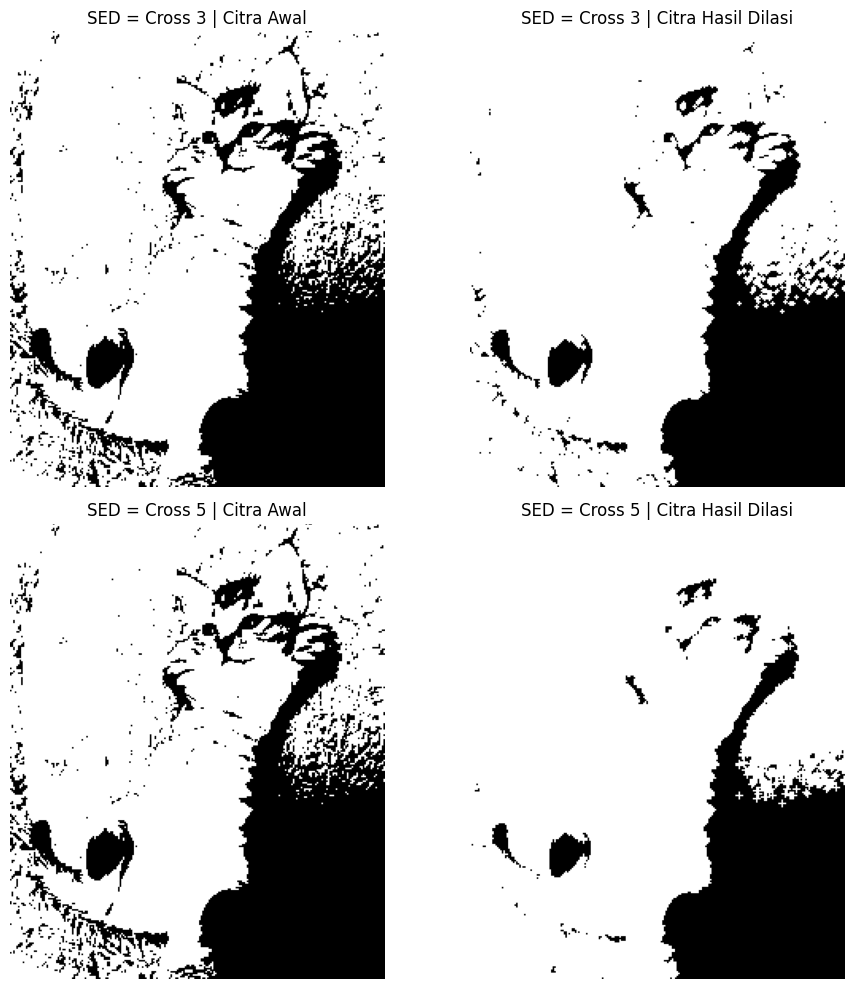

In [11]:
# Tugas 9: Dilasi (SED Cross 3x3 dan 5x5)

if 'img_thresh' in locals():
    # Buat kernel
    kernel_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    kernel_cross_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

    # Lakukan dilasi
    img_dilasi_c3 = cv2.dilate(img_thresh, kernel_cross_3x3, iterations=1)
    img_dilasi_c5 = cv2.dilate(img_thresh, kernel_cross_5x5, iterations=1)

    # Tampilkan hasil
    plt.figure(figsize=(10, 10))

    # Plot untuk 3x3
    plt.subplot(2, 2, 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("SED = Cross 3 | Citra Awal")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(img_dilasi_c3, cmap='gray')
    plt.title("SED = Cross 3 | Citra Hasil Dilasi")
    plt.axis('off')

    # Plot untuk 5x5
    plt.subplot(2, 2, 3)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("SED = Cross 5 | Citra Awal")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(img_dilasi_c5, cmap='gray')
    plt.title("SED = Cross 5 | Citra Hasil Dilasi")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

else:
    print("Harap jalankan Cell 3 terlebih dahulu untuk memuat gambar.")

Dilasi Circular 3x3 & 5x5

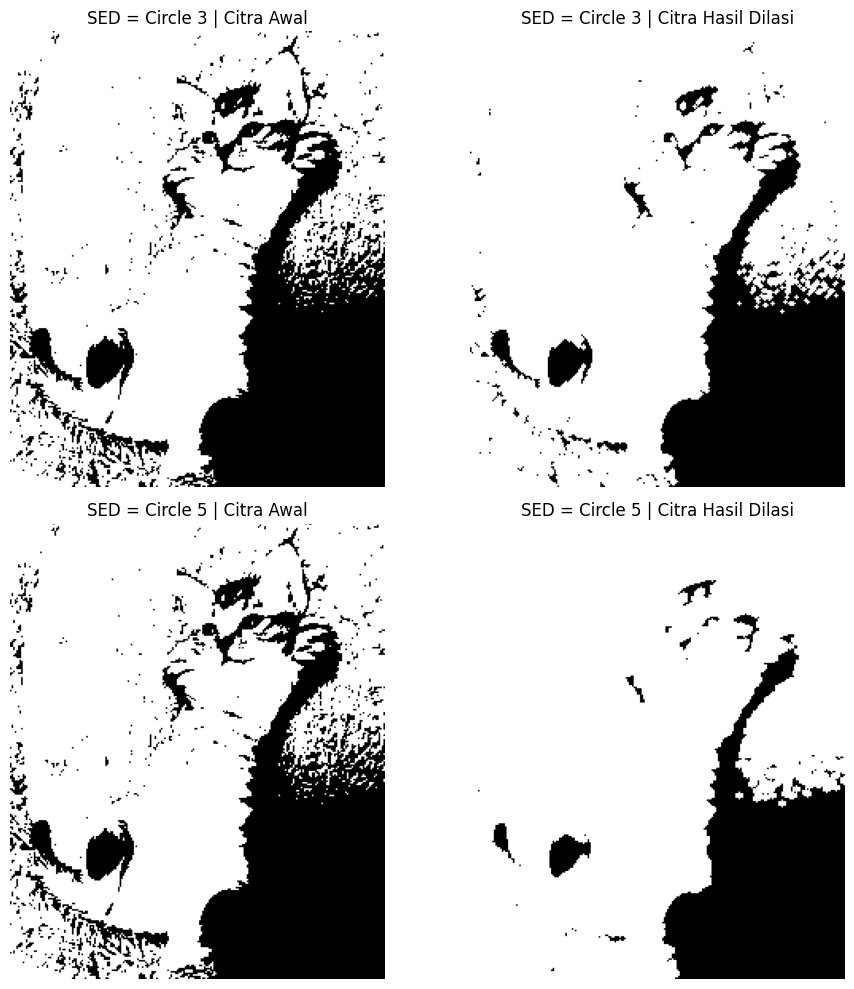

In [12]:
# Tugas 10: Dilasi (SED Circular 3x3 dan 5x5)

if 'img_thresh' in locals():
    # Buat kernel
    kernel_circle_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    kernel_circle_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

    # Lakukan dilasi
    img_dilasi_e3 = cv2.dilate(img_thresh, kernel_circle_3x3, iterations=1)
    img_dilasi_e5 = cv2.dilate(img_thresh, kernel_circle_5x5, iterations=1)

    # Tampilkan hasil
    plt.figure(figsize=(10, 10))

    # Plot untuk 3x3
    plt.subplot(2, 2, 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("SED = Circle 3 | Citra Awal")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(img_dilasi_e3, cmap='gray')
    plt.title("SED = Circle 3 | Citra Hasil Dilasi")
    plt.axis('off')

    # Plot untuk 5x5
    plt.subplot(2, 2, 3)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("SED = Circle 5 | Citra Awal")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(img_dilasi_e5, cmap='gray')
    plt.title("SED = Circle 5 | Citra Hasil Dilasi")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

else:
    print("Harap jalankan Cell 3 terlebih dahulu untuk memuat gambar.")

Erosi Rectangle 3x5 & 5x7

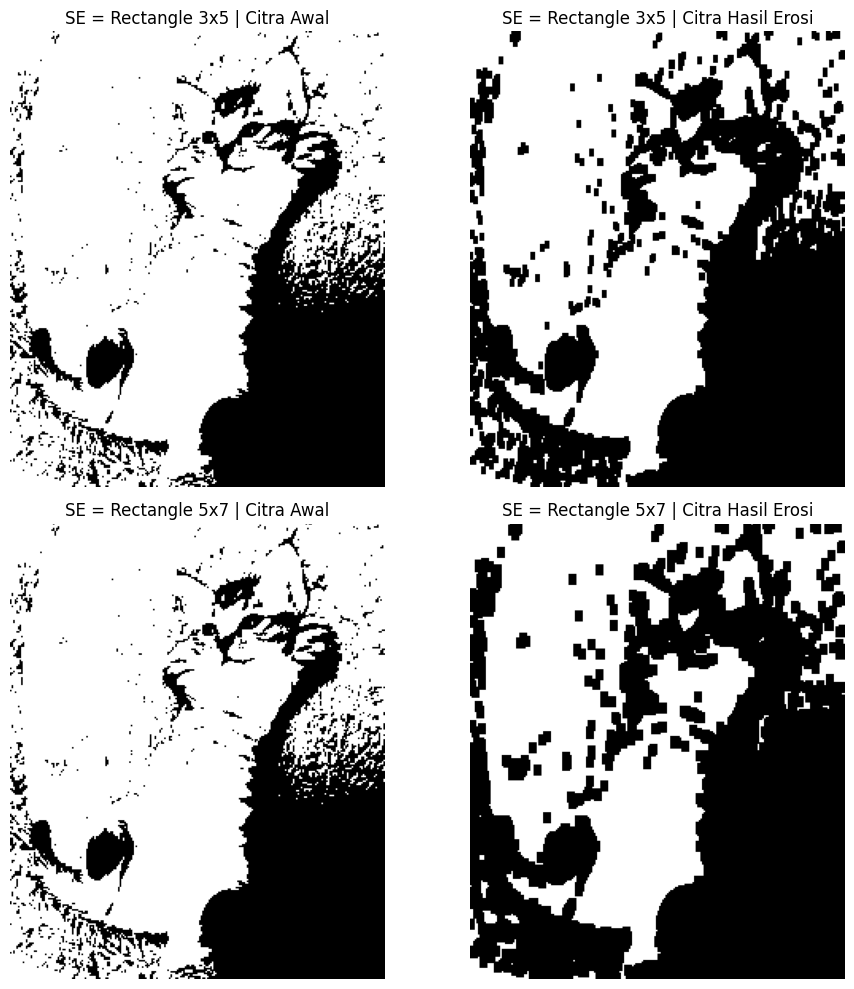

In [13]:
# Tugas 11: Erosi (SE Rectangle 3x5 dan 5x7)

if 'img_thresh' in locals():
    # Buat kernel (lebar, tinggi)
    kernel_rect_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
    kernel_rect_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

    # Lakukan erosi
    img_erosi_r1 = cv2.erode(img_thresh, kernel_rect_3x5, iterations=1)
    img_erosi_r2 = cv2.erode(img_thresh, kernel_rect_5x7, iterations=1)

    # Tampilkan hasil
    plt.figure(figsize=(10, 10))

    # Plot untuk 3x5
    plt.subplot(2, 2, 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("SE = Rectangle 3x5 | Citra Awal")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(img_erosi_r1, cmap='gray')
    plt.title("SE = Rectangle 3x5 | Citra Hasil Erosi")
    plt.axis('off')

    # Plot untuk 5x7
    plt.subplot(2, 2, 3)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("SE = Rectangle 5x7 | Citra Awal")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(img_erosi_r2, cmap='gray')
    plt.title("SE = Rectangle 5x7 | Citra Hasil Erosi")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

else:
    print("Harap jalankan Cell 3 terlebih dahulu untuk memuat gambar.")

Erosi Line Vertikal 3 & 5

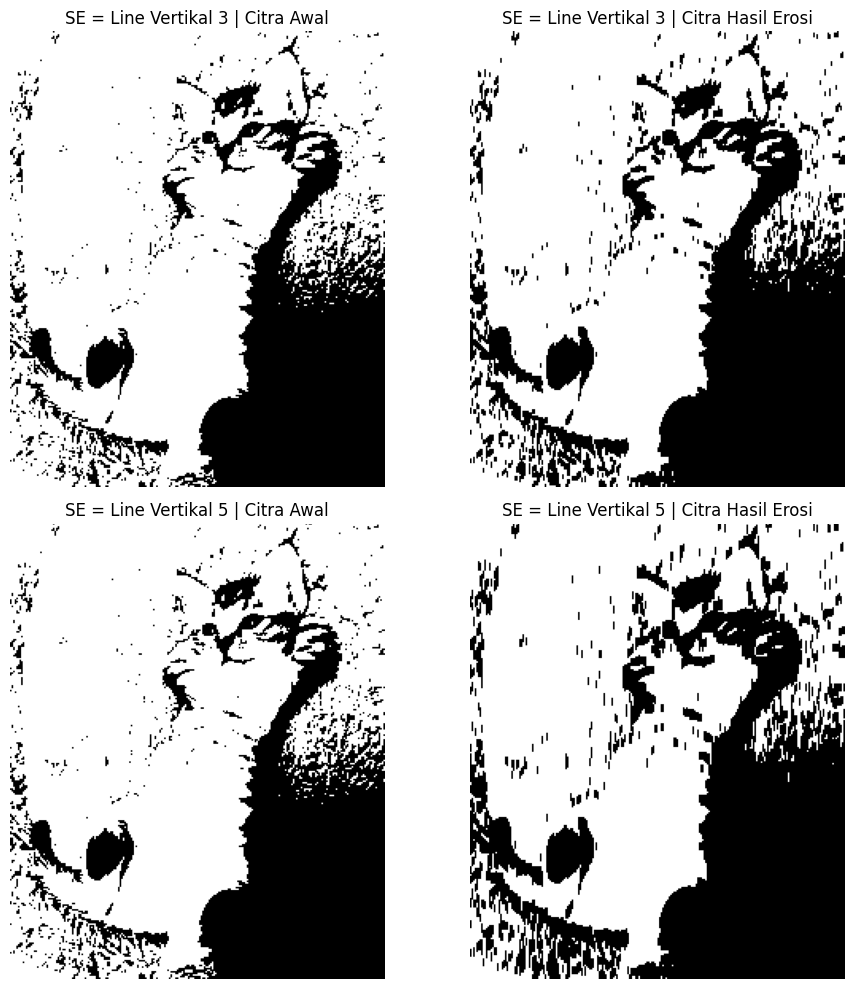

In [14]:
# Tugas 12: Erosi (SE Line Vertikal 3 dan 5)

if 'img_thresh' in locals():
    # Buat kernel (lebar, tinggi)
    # Line Vertikal 3 = 1x3
    # Line Vertikal 5 = 1x5
    kernel_line_v3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
    kernel_line_v5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

    # Lakukan erosi
    img_erosi_v3 = cv2.erode(img_thresh, kernel_line_v3, iterations=1)
    img_erosi_v5 = cv2.erode(img_thresh, kernel_line_v5, iterations=1)

    # Tampilkan hasil
    plt.figure(figsize=(10, 10))

    # Plot untuk Vertikal 3
    plt.subplot(2, 2, 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("SE = Line Vertikal 3 | Citra Awal")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(img_erosi_v3, cmap='gray')
    plt.title("SE = Line Vertikal 3 | Citra Hasil Erosi")
    plt.axis('off')

    # Plot untuk Vertikal 5
    plt.subplot(2, 2, 3)
    plt.imshow(img_thresh, cmap='gray')
    plt.title("SE = Line Vertikal 5 | Citra Awal")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(img_erosi_v5, cmap='gray')
    plt.title("SE = Line Vertikal 5 | Citra Hasil Erosi")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

else:
    print("Harap jalankan Cell 3 terlebih dahulu untuk memuat gambar.")